<a href="https://colab.research.google.com/github/russelpac/ProyectoEnColab/blob/main/Proyecto_Semana2_Paco_Russel_y_Gonzales_Valeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧾 **Análisis de un Sistema de Inventario / Stock** 🛒

---

### 👥 **Autores**
- **Paco Velasquez Russel Mauricio**  
- **Gonzales Valeria Genesis**

---

### 🏫 **Curso**
- *Actualización Tecnológica “B”*

---

### 📅 **Fecha**
- *19 de noviembre de 2025*

---

### 📧 **Contacto**
- russel.paco@sistemas.edu.bo
- genesis.gonzales@sistemas.edu.bo

---

> 💡 *Proyecto desarrollado con el objetivo de analizar, gestionar y vizualizar una base de datos con la herramienta PANDAS*

---



## ‼️**IMPORTANTE:** Por favor, ejecute este notebook secuencialmente de arriba a abajo.

## ⚙️**Carga de datos**

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/inventario_stock.csv', encoding='utf-8')



## 🔎 **Exploracion de datos**

---

In [ ]:
df.head()          # Mostramos las primeras 5 filas


,fecha;producto;categoria;almacen;movimiento;cantidad
0,2025-04-07;Hogar-8288;Hogar;Oeste;entrada;8
1,2025-06-03;Ropa-9974;Ropa;Central;salida;10
2,2025-09-18;Electrónica-3061;Electrónica;Centra...
3,2025-10-17;Hogar-6786;Hogar;Oeste;entrada;6
4,2025-07-21;Hogar-2464;Hogar;Sur;salida;7


In [ ]:
df.sample(10)      # muestra aleatoria de 10 filas


,fecha;producto;categoria;almacen;movimiento;cantidad
1366,2025-06-02;Papelería-5870;Papelería;Norte;entr...
4586,2025-05-05;Papelería-8856;Papelería;Norte;entr...
5788,2025-09-18;Electrónica-5198;Electrónica;Oeste;...
2130,2025-02-25;Ropa-3392;Ropa;Oeste;entrada;11
4161,2025-03-13;Ropa-4317;Ropa;Este;entrada;5
9491,2025-03-23;Papelería-1328;Papelería;Norte;entr...
5312,2025-07-10;Alimentos-3791;Alimentos;Sur;salida;9
9452,2025-08-23;Limpieza-7122;Limpieza;Central;sali...
290,2025-09-01;Papelería-5156;Papelería;Central;sa...
4408,2025-08-11;Alimentos-3911;Alimentos;Oeste;entr...


In [ ]:
df.info()          # tipos y no nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 1 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   fecha;producto;categoria;almacen;movimiento;cantidad  10100 non-null  object
dtypes: object(1)
memory usage: 79.0+ KB


In [ ]:
df.describe(include='all')  # estadísticas


,fecha;producto;categoria;almacen;movimiento;cantidad
count,10100
unique,10000
top,2025-03-10;Hogar-4053;Hogar;Norte;entrada;7
freq,2


In [ ]:
df.isnull().sum()  # cantidad de nulos por columna

,0
fecha;producto;categoria;almacen;movimiento;cantidad,0


## 🧩 **Funciones utilitarias y globales**

### 🌟**FUNCIONES UTILITARIAS**

In [ ]:

#Función para transformar las columnas
def transformar_a_columnas(df):
  col0 = df.columns[0]
  df2 = df[col0].str.split(';', expand=True)
  df2.columns = ['fecha','producto','categoria','almacen','movimiento','cantidad']
  return df2
#Función para limpiar texto mínimo
def limpiar_espacios(df):
  for col in df.columns:
    df[col] = df[col].astype(str).str.strip()
  return df
#Función para convertir tipos
def convertir_tipos(df):
  df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
  df['cantidad'] = pd.to_numeric(df['cantidad'], errors='coerce')
  cols_cat = ['producto', 'categoria', 'almacen', 'movimiento']
  for col in cols_cat:
    df[col] = df[col].astype(str).str.strip().str.lower()
    df[col] = df[col].replace(
        ["", "nan", "none"],
        pd.NA
    )
    df[col] = df[col].replace(r'^\s*$', pd.NA, regex=True)
  return df
#Función para borrar lso valores nulos
def borrar_nulos(df):
  df = df.dropna()
  return df
#Función para la eliminacion de duplicados
def eliminar_duplicados(df):
  df = df.drop_duplicates()
  return df
#Función para la validacion de los rangos
def validar_rangos(df):
  df = df[df['cantidad'] > 0]
  df = df.reset_index(drop=True)
  return df
#Función para dibujar gráfico de barras
def grafico_de_barras(df):
  cant_por_categoria = df.groupby('categoria')['cantidad'].sum()
  cant_por_categoria.plot(kind = 'bar')
  plt.title('Cantidad total movida por categoría')
  plt.xlabel('Categoría')
  plt.ylabel('Cantidad total')
  plt.show()

#Función para dibujar gráfico de linea
def grafico_de_linea(df):
  plt.figure(figsize=(14, 6))
  df_fecha = df.groupby('fecha')['cantidad'].sum()
  plt.plot(df_fecha.index, df_fecha.values)
  df_fecha.plot(kind = 'line')
  plt.title('Tendencia temporal de movimientos')
  plt.xlabel('Fecha')
  plt.ylabel('Cantidad total movida')
  plt.xticks(rotation = 45)
  plt.tight_layout()
  plt.show()

#Funcion para dibujar gráfico de dispersión
def grafico_de_dispersion(df):
  plt.figure(figsize=(14, 6))
  plt.scatter(df['fecha'],df['cantidad'])
  plt.title('Dispersión: Fecha vs Cantidad')
  plt.xlabel('Fecha')
  plt.ylabel('Cantidad')
  plt.show()





### 🌌**FUNCIONES GLOBALES**

In [ ]:
#Función global para limpiar el csv
def clean_data(df):
  df = transformar_a_columnas(df)
  df = limpiar_espacios(df)
  df = convertir_tipos(df)
  df = borrar_nulos(df)
  df = eliminar_duplicados(df)
  df = validar_rangos(df)
  return df
#para llamar a la funcion df=clean_data(df)

#Función global para dibujar tablas
#Antes de usar esta funcion el csv debe estar limpio
def  plot_graphics(df):
  grafico_de_barras(df)
  grafico_de_linea(df)
  grafico_de_dispersion(df)

#Para llamar a la funcion plot_graphics(df)




## 🧹**Transformaciones y limpieza aplicada**

### ❗**Nota importante:** Si desea ejecutar el proceso completo automáticamente, puede usar la función `clean_data(df)`  definida en funciones globales.
---

###  1️⃣***Transformaciones de las columnas***
---

In [ ]:
# df tiene 1 columna con todas las filas como '2025-08-14;Ropa-6200;Ropa;Oeste;entrada;7'
col0 = df.columns[0]

# 1) separar por ';' en columnas nuevas
df2 = df[col0].str.split(';', expand=True)

# 2) asignar nombres a cada columna
df2.columns = ['fecha','producto','categoria','almacen','movimiento','cantidad']

# 3) reemplazar el df original por el dividido
df = df2
#IMPORTANTE ESTA CELDA DE CODIGO SOLO SE EJECUTA UNA VEZ

In [ ]:
#Comprobamos que se realizó la separación de columnas correctamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fecha       10100 non-null  object
 1   producto    10100 non-null  object
 2   categoria   10100 non-null  object
 3   almacen     10100 non-null  object
 4   movimiento  10100 non-null  object
 5   cantidad    10100 non-null  object
dtypes: object(6)
memory usage: 473.6+ KB


**Justificación corta**: Como pudimos observar al momento de realizar `df.info` tenemos solo una columna, entonces lo que hicimos fue dividir cada columna de manera correcta, esto con el objetivo de analizar cada columna de forma independiente.



###   2️⃣ ***Limpiar texto mínimo***

---




In [ ]:
# limpiar espacios a los costados
for col in df.columns:
    df[col] = df[col].astype(str).str.strip()


**Justificación corta:** Sirve para limpiar los datos que tiene espacios antes o después de los valores,valores mezclados entre números y texto,
inconsistencias que afectan búsquedas, filtros y agrupaciones.





###   3️⃣ ***Convertir tipos***

---

In [ ]:
#Convertir fecha a datetime
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
#Convertir cantidad a numero
df['cantidad'] = pd.to_numeric(df['cantidad'], errors='coerce')
#Normalizar columnas categóricas
cols_cat = ['producto', 'categoria', 'almacen', 'movimiento']

for col in cols_cat:
    # 1. Convertir a texto y limpiar
    df[col] = df[col].astype(str).str.strip().str.lower()

    # 2. Convertir valores vacíos o inválidos a NaN
    df[col] = df[col].replace(
        ["", "nan", "none"],   # valores típicos indeseados después del strip
        pd.NA
    )

    # 3. También reemplazar espacios vacíos
    df[col] = df[col].replace(r'^\s*$', pd.NA, regex=True)




In [ ]:
#Verificamos
df.dtypes

,0
fecha,datetime64[ns]
producto,object
categoria,object
almacen,object
movimiento,object
cantidad,int64


**Justificación corta:** Según la politica de calidad de datos, cada columna debe poseer el tipo de dato adecuado.

### 4️ ***Revision de valores nulos***

---

In [ ]:
#Deacuerdo a la politica de calidad de datos los valores nulos seran eliminados
#Verificamos cuantos nulos hay por columnas
df.isnull().sum()

,0
fecha,0
producto,0
categoria,0
almacen,53
movimiento,0
cantidad,0


In [ ]:
#Cuantos registros hay antes de eliminar los valores nulos
df.dropna().shape


(10047, 6)

In [ ]:
#Procedemos a eliminar los valores nulos segun la politica de calidad de datos
df = df.dropna()


In [ ]:
#verificamos si los valores nulos fueron eliminados
df.isnull().sum()

,0
fecha,0
producto,0
categoria,0
almacen,0
movimiento,0
cantidad,0


**Justifiación corta:** Según la politica de calidad de datos los registros con campos esenciales vacíos seran descartados.

### 5️⃣***Eliminacion de duplicados***

---

In [ ]:
#ver cuantos duplicados hay en total
df.duplicated().sum()


np.int64(100)

In [ ]:
#Ver un vistazo de los duplicados
df[df.duplicated()]

,fecha,producto,categoria,almacen,movimiento,cantidad
10000,2025-04-16,limpieza-7552,limpieza,sur,salida,4
10001,2025-03-27,papelería-2314,papelería,central,entrada,6
10002,2025-05-15,limpieza-7749,limpieza,central,salida,3
10003,2025-09-21,hogar-2494,hogar,oeste,salida,2
10004,2025-10-03,hogar-3426,hogar,norte,salida,4
...,...,...,...,...,...,...
10095,2025-02-23,ropa-7260,ropa,norte,salida,7
10096,2025-05-20,ropa-2143,ropa,este,entrada,9
10097,2025-01-24,limpieza-4158,limpieza,central,entrada,5
10098,2025-08-12,papelería-8308,papelería,central,salida,3


In [ ]:
#Segun la politica de calidad de datos eliminamos los duplicados
df = df.drop_duplicates()


In [ ]:
#verificamos si se eliminaron los duplicados
df.duplicated().sum()

np.int64(0)

**Justificación corta:** Las filas repetidas o idénticas serán eliminadas para evitar sobrecontar movimientos.

### 6️⃣ ***Validacion de rangos***

---

In [ ]:
#Verificamos los valores invalidos en la columna cantidad
df[df['cantidad'] <= 0].shape[0]


0

In [ ]:
#Según la politica de calidad de datos los valores invalidos en la columna cantidad serán eliminados

df = df[df['cantidad'] > 0]



In [ ]:
#limpiamos los indices
df = df.reset_index(drop=True)


**Justificación corta:** La columna cantidad solo debe contener valores mayores que cero.
Cualquier número negativo o igual a cero será rechazado o corregido.

###7️⃣ ***Revisión final general***

---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9947 entries, 0 to 9946
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fecha       9947 non-null   datetime64[ns]
 1   producto    9947 non-null   object        
 2   categoria   9947 non-null   object        
 3   almacen     9947 non-null   object        
 4   movimiento  9947 non-null   object        
 5   cantidad    9947 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 466.4+ KB


In [ ]:
df.head()

,fecha,producto,categoria,almacen,movimiento,cantidad
0,2025-04-07,hogar-8288,hogar,oeste,entrada,8
1,2025-06-03,ropa-9974,ropa,central,salida,10
2,2025-09-18,electrónica-3061,electrónica,central,salida,13
3,2025-10-17,hogar-6786,hogar,oeste,entrada,6
4,2025-07-21,hogar-2464,hogar,sur,salida,7


  ### 💼 **Importamos**

In [ ]:
df.to_csv('inventario_limpio.csv', index=False)


In [ ]:
from google.colab import files
files.download('inventario_limpio.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 📈 **Estadisticas basicas**

---




In [ ]:
df[['cantidad']].describe()


,cantidad
count,9947.000000
mean,7.028853
std,2.669260
min,1.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,18.000000


### 📝 *Informe estadístico*

A continuación se presentan los estadísticos descriptivos de la variable numérica **cantidad**, correspondiente al número de unidades involucradas en cada movimiento de inventario. La base de datos contiene 9.947 registros válidos. La media es de aproximadamente 7,03 unidades, mientras que la mediana es 7, lo que indica una distribución relativamente simétrica en torno a este valor. La desviación estándar, de 2,67, muestra una variabilidad moderada en los volúmenes de movimiento.

En cuanto a los rangos, el valor mínimo registrado es 1 unidad, y el máximo es 18 unidades. Además, los cuartiles indican que el 25% de las operaciones registran 5 unidades o menos, el 50% registran 7 unidades, y el 75% no superan las 9 unidades. Estos resultados permiten comprender la distribucion y dispersión de las cantidades manejadas en el inventario.

## 👥**Agrupamientos y segmentacion**

---

In [ ]:
#Cuantos movimientos tiene cada categoria (count)
#Promedio de cantidad movida en cada categoría (mean)
tabla_categoria = df.groupby('categoria')['cantidad'].agg(['count', 'mean']).reset_index()
tabla_categoria


,categoria,count,mean
0,alimentos,1650,7.028485
1,electrónica,1673,7.072325
2,hogar,1673,7.034668
3,limpieza,1602,6.999376
4,papelería,1660,7.025904
5,ropa,1689,7.011249


In [ ]:
#Cómo se distribuyen las entradas y salidas en cada almacén
tabla_mov_almacen = pd.crosstab(df['almacen'], df['movimiento'])
tabla_mov_almacen


movimiento,entrada,salida
almacen,,
central,972,1001
este,974,1014
norte,1058,1022
oeste,954,971
sur,1000,981


In [ ]:
#Los Top 10 productos con mayor movimiento total
top10_productos = (
    df.groupby('producto')['cantidad']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)
top10_productos


,producto,cantidad
0,ropa-7154,35
1,alimentos-9989,29
2,hogar-5230,28
3,hogar-1183,28
4,hogar-1340,28
5,electrónica-5628,28
6,limpieza-7518,28
7,limpieza-3694,27
8,electrónica-8502,27
9,limpieza-5422,26


## 👨‍🔬**Feature engineering básico**

---


In [ ]:
# Variable derivada 'mes' a partir de fecha
df['mes'] = df['fecha'].dt.month
df.head()


,fecha,producto,categoria,almacen,movimiento,cantidad,mes
0,2025-04-07,hogar-8288,hogar,oeste,entrada,8,4
1,2025-06-03,ropa-9974,ropa,central,salida,10,6
2,2025-09-18,electrónica-3061,electrónica,central,salida,13,9
3,2025-10-17,hogar-6786,hogar,oeste,entrada,6,10
4,2025-07-21,hogar-2464,hogar,sur,salida,7,7


**Descripcion:** Se generó la variable derivada **mes** a partir de la columna fecha, extrayendo el número de mes. Esta transformación permite analizar el comportamiento del inventario a lo largo del tiempo y detectar variaciones estacionales en los movimientos de productos.

In [ ]:
#Variable por rangos: Creación de bins de cantidad
df['rango_cantidad'] = pd.cut(
    df['cantidad'],
    bins=[0, 5, 10, df['cantidad'].max()],
    labels=['Bajo (1–5)', 'Medio (6–10)', 'Alto (11+)']
)
df.head()

,fecha,producto,categoria,almacen,movimiento,cantidad,mes,rango_cantidad
0,2025-04-07,hogar-8288,hogar,oeste,entrada,8,4,Medio (6–10)
1,2025-06-03,ropa-9974,ropa,central,salida,10,6,Medio (6–10)
2,2025-09-18,electrónica-3061,electrónica,central,salida,13,9,Alto (11+)
3,2025-10-17,hogar-6786,hogar,oeste,entrada,6,10,Medio (6–10)
4,2025-07-21,hogar-2464,hogar,sur,salida,7,7,Medio (6–10)


**Descripcion:** Se creó la variable categórica rango_cantidad, que clasifica la variable cantidad en tres tramos interpretables: **bajo** (1–5 unidades), **medio** (6–10 unidades) y **alto** (11 o más). Estos rangos facilitan el análisis de la distribución de volúmenes de movimiento y permiten identificar patrones por segmentos.

## 📊**Visualizaciones (Matplotlib + Pandas)**

---

### ❗**Nota importante:** Si desea ejecutar el proceso completo automáticamente, puede usar la función `plot_graphics(df)`  definida en funciones globales.
---

###1️⃣ ***Gráfico de Barras - Cantidad total por categoría***

---

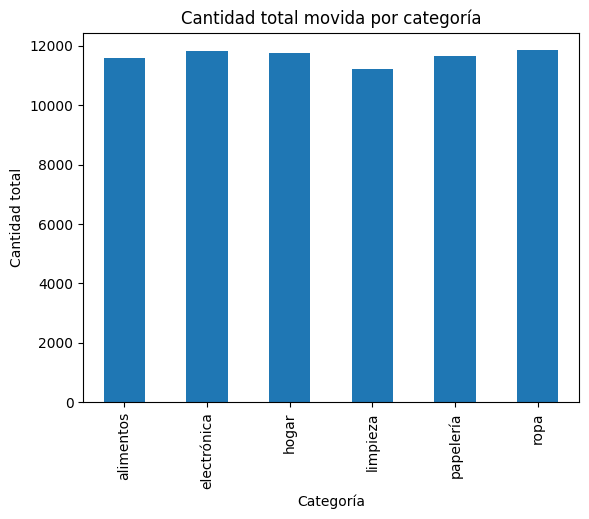

In [ ]:
import matplotlib.pyplot as plt
# Agrupar por categoría y sumar la cantidad de movimientos de cada una
cant_por_categoria = df.groupby('categoria')['cantidad'].sum()
# Graficar como barras
cant_por_categoria.plot(kind = 'bar')
# Título y etiquetas
plt.title('Cantidad total movida por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad total')
plt.show() # Mostrar gráfico

- El gráfico muestra cuál categoría tiene **mayor movimiento total** en el inventario.
- Permite identificar **productos de alta rotación** y categorías que requieren más atención en control de stock.
- La categoria **ropa** es la que más cantidad total tiene.

###2️⃣ ***Gráfico de Línea - Tendencia temporal de movimientos***

---

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


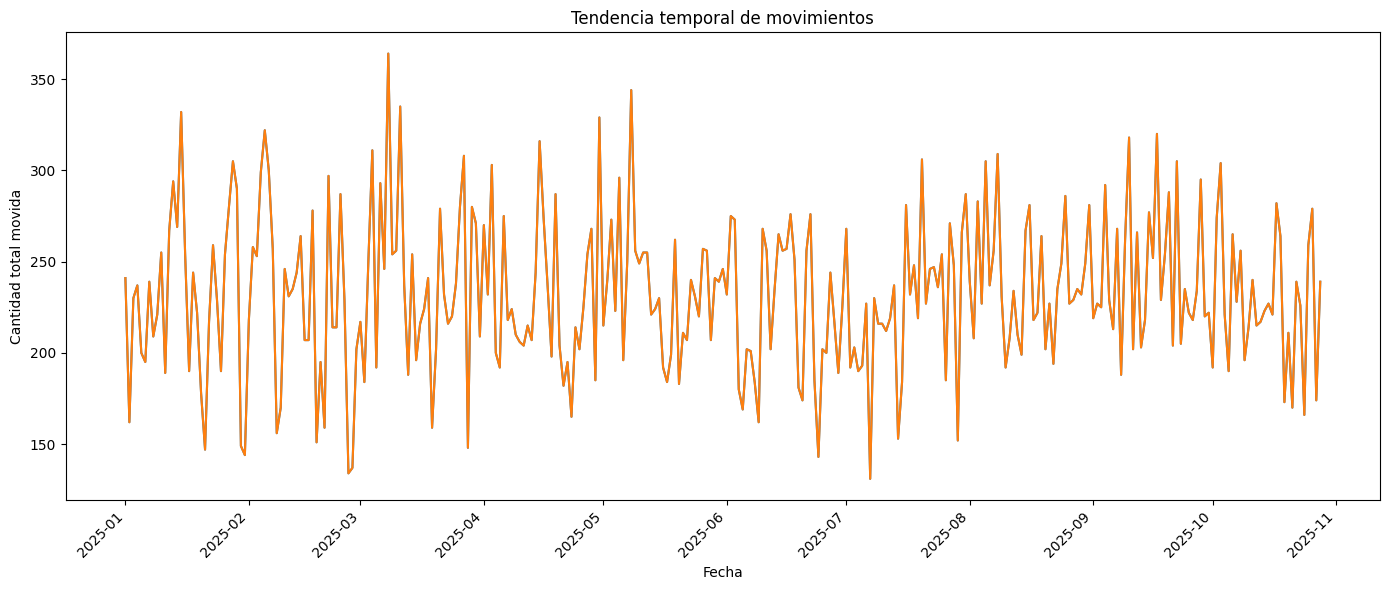

In [ ]:
plt.figure(figsize=(14, 6)) # Aumenta ancho y alto de la gráfica
# Agrupar por fecha y sumar la cantidad total movida
df_fecha = df.groupby('fecha')['cantidad'].sum()
plt.plot(df_fecha.index, df_fecha.values)
# Graficar tendencia a lo largo del tiempo
df_fecha.plot(kind = 'line')
# Título y etiquetas
plt.title('Tendencia temporal de movimientos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad total movida')
plt.xticks(rotation = 45) # Rotar etiquetas de fecha para mayor legibilidad
plt.tight_layout() # Ajustar el espaciado
plt.show() # Mostrar gráfico

- El gráfico muestra **cómo varía** la cantidad total movida por fecha a lo largo del tiempo.
- Permite detectar **picos de actividad** en fechas concretas, que podrían estar relacionados con reposiciones, promoiones o temporadas específicas.
- Durante el mes de marzo es donde más movimiento se registro.

###3️⃣ ***Gráfico de dispersión - Relación entre fecha y cantidad***

---

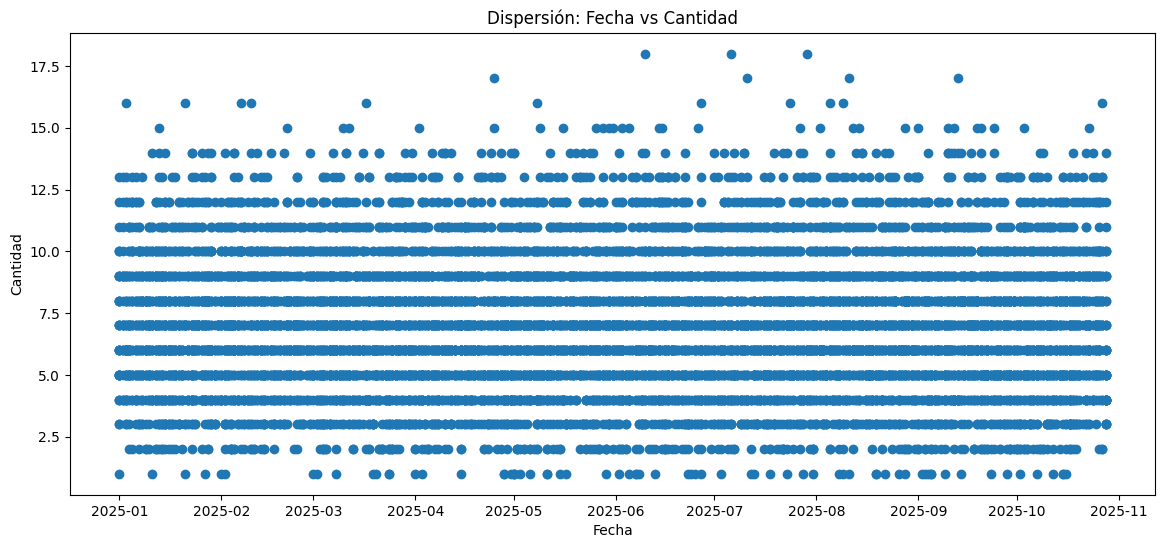

In [ ]:
plt.figure(figsize=(14, 6)) # Aumenta ancho y alto de la gráfica
# Graficar puntos para ver la dipersión de movimientos por fecha
plt.scatter(df['fecha'],df['cantidad'])
# Título y etiquetas
plt.title('Dispersión: Fecha vs Cantidad')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.show() # Mostrar gráfico

- El gráfico permite ver **cómo se distribuyen** las cantidades movidas en diferentes fechas.
- Muestra si hay días con movimientos muy altos (puntos altos) o muchos días con movimientos bajos (puntos concentrados en la parte baja).
- Ayuda a identificar **eventos puntuales** que generan cambios bruscos en el inventario y diferencias entre almacenes o productos.
- En el gráfico existe mucha variabilidad diaria pero dentro de un rango limitado, asi tambien presenta varios picos durante Junio,Julio y Agosto.

## 📐**Análisis de tendencias y patrones**
---

El análisis de los datos del inventario muestra varios comportamientos consistentes. En primer lugar, las categorías presentan diferencias claras en el volumen de movimientos: algunas concentran más actividad, lo que indica una rotación más alta y una mayor demanda operativa. Esto coincide con lo observado en el gráfico de barras, donde ciertas categorías destacan por la cantidad total movida.

A nivel temporal, la gráfica de línea sugiere que los movimientos no se distribuyen de manera uniforme durante el año. Hay fechas con concentraciones más altas de actividad, lo que podría estar asociado a periodos de reposición, campañas específicas o ciclos propios del inventario, es decir, los movimientos responden a necesidades específicas de entrada o salida. Aunque la variabilidad es constante, se aprecia una tendencia a incrementos en ciertos tramos.

La dispersión entre fechas y cantidades muestra que la mayoría de los registros se mantienen en rangos moderados, mientras que los valores más altos se presentan de forma puntual, lo que sugiere picos específicos en la operación.

Finalmente, el top-10 de productos confirma que solo un grupo reducido genera gran parte del movimiento total.
En el top 10 tenemos al producto `ropa-7154` con un total de movimiento de **35**.


## ✔️**Validación de resultados**

### 1️⃣ **Verificacion del tamaño antes y despues de la limpieza**

**Antes el numero de filas era de:** 10100

**Qué cantidad de filas se elimino?**

- Valores nulos eliminados: 53
- Valores duplicadoes eliminados: 100


In [ ]:
print("Después de la limpieza:", df.shape)

Después de la limpieza: (9947, 8)


### 2️⃣**Verificación final de duplicados**

In [ ]:
df.duplicated().sum()

np.int64(0)

### 3️⃣**Verifiación final de nulos**

In [ ]:
df.isnull().sum()

,0
fecha,0
producto,0
categoria,0
almacen,0
movimiento,0
cantidad,0
mes,0
rango_cantidad,0


### 4️⃣ **Chequeo de rangos razonable**

In [ ]:
#Los valores enteros de cantidad segun la politica de calidad de datos debe ser mayor a 0
df[df['cantidad'] <= 0]


,fecha,producto,categoria,almacen,movimiento,cantidad,mes,rango_cantidad


In [ ]:
#El minimo de los valores de cantidad debe ser mayor a 0 segun la politica de calidad de datos
df['cantidad'].min()



1

In [ ]:
#El maximo de los valores de cantidad debe ser razonable
df['cantidad'].max()

18

### 5️⃣ **Chequeo de valores únicos en columnas categóricas**

In [ ]:
#Nos aseguramos que no haya errores de escritura, como ser: Entrada vs entrada
for col in ['categoria', 'almacen', 'movimiento']:
    print(col, df[col].unique())


categoria ['hogar' 'ropa' 'electrónica' 'alimentos' 'papelería' 'limpieza']
almacen ['oeste' 'central' 'sur' 'este' 'norte']
movimiento ['entrada' 'salida']


### 6️⃣**Chequeo de tipos**

In [ ]:
#verificamos que las columnas presenten tipos de datos correctos segun la politica de calidad de datos
df.dtypes

,0
fecha,datetime64[ns]
producto,object
categoria,object
almacen,object
movimiento,object
cantidad,int64
mes,int32
rango_cantidad,category


### 7️⃣**Chequeo de fechas razonables**

In [ ]:
#Confirma que no haya fechas absurdas
df['fecha'].min(), df['fecha'].max()


(Timestamp('2025-01-01 00:00:00'), Timestamp('2025-10-28 00:00:00'))

### 8️⃣**Chequeo del índice**


In [ ]:
#Confirma que esté ordenado y sin huecos
df.index.is_monotonic_increasing


True

## 📑**Conclusiones y recomendaciones**

---

### 1️⃣ **Mejora en el control del inventario**
Gracias a la limpieza y depuración de duplicados, el área puede confiar en que los movimientos y existencias reportadas son correctos, evitando errores en pedidos, conteos o reposiciones.
### 2️⃣ **Priorizar gestión sobre productos de alto impacto**
El Top-10 de productos con mayor movimiento permite enfocar esfuerzo en:

- artículos críticos,

- ítems de mayor demanda,

- productos con más riesgo de quiebre.
### 3️⃣ **Mejorar los procesos de registro y carga de datos**
Ver inconsistencias en categorías o almacenes (mayúsculas, variaciones de nombres, etc.) puede llevar al área a estandarizar formularios, validar campos o automatizar procesos de ingreso.
### 4️⃣ **Tomar decisiones más precisas y basadas en datos**
Con un dataset limpio, confiable y con métricas descriptivas claras (mean, median, std), el área puede:

- planificar compras,

- reducir sobrestock,

- evitar quiebres,

- optimizar el uso de bodegas.
### 5️⃣ **Evitar anomalías o errores históricos**
El análisis de rangos, outliers y consistencia permite detectar:

- registros mal cargados,

- fechas incorrectas,

- cantidades anormales.
Esto ayuda a corregir prácticas internas de registro.

## 💸**Limitaciones y trabajo futuro**
---

### **Aspectos que no se pudieron cubrir y cómo podrían mejorarse**

- ***Falta de información económica y financiera:***
El archivo CSV no incluye datos clave como precios unitarios, costos, márgenes o valores totales por movimiento. Esto limita la posibilidad de realizar análisis financieros, identificar productos más rentables o evaluar el impacto económico del inventario. Para mejorar este aspecto, se recomienda incluir campos de precio, costo y valor total por movimiento.

- ***Ausencia de un sistema automatizado de gestión de inventario:***
Actualmente no se dispone de un mecanismo automatizado para detectar productos agotados o gestionar su reposición. La implementación de un sistema de alerta o reposición automática, basado en los niveles mínimos de stock y las estadísticas de consumo, permitiría optimizar la disponibilidad de productos y reducir quiebres de stock.

- ***Falta de integración con una base de datos externa o histórico consolidado:***
El análisis se limita al contenido del CSV y no se cuenta con un historial completo de movimientos a lo largo del tiempo. Conectar el sistema a una base de datos centralizada, que conserve datos históricos de ventas, ingresos, compras y ajustes, permitiría realizar análisis temporales más avanzados (mensuales, anuales o estacionales) y mejorar la capacidad de predicción y planificación del inventario.

- ***Limitaciones en la granularidad del tiempo:***
Algunas variables temporales (fecha, hora, periodos o temporadas) no estaban disponibles o no podían derivarse completamente. Incorporar campos más detallados facilitaría la creación de tramos temporales, análisis por horas pico, días de la semana, temporadas altas o tendencias anuales.

- ***Variables categóricas incompletas o poco estandarizadas:***
Algunas categorías podrían estar repetidas con nombres distintos o no suficientemente descriptivos. La estandarización de nombres, códigos y clasificaciones permitiría realizar análisis más precisos y evitar pérdidas de información por divergencias en los datos.

- ***Limitaciones en la trazabilidad del movimiento de productos:***
El dataset no especifica claramente ciertos metadatos (usuario responsable del movimiento, departamento, tipo exacto de transacción, proveedor, etc.). Incluir esta información permitiría mejorar la auditoría del inventario, identificar errores humanos y optimizar procesos internos.

## 📁**Anexos**
---




**Version de Pandas:** 2.2.2
### **Guia para ejecutarlo todo**
Todo el notebook debe ser ejecutado de arriba a abajo, opcionalmente se encuentran disponibles las funciones globales  `clean_data(df)` y   `plot_graphics(df)` que pueden usarse si es que el usuario quiere una opción más directa para la limpieza del csv.
### **Funciones utilitarias usadas**
  -  `transformar_a_columnas(df)`  
  - `limpiar_espacios(df)`  
  - `convertir_tipos(df)`
  - `borrar_nulos(df)`
  - `eliminar_duplicados(df)`
  - `validar_rangos(df)`
  - `grafico_de_barras(df)`
  - `grafico_de_linea(df)`
  - `grafico_de_dispersion(df)`